# The Spark Foundation ( Data Science & Business Analytics )

## ***Perform ‘Exploratory Data Analysis’ on dataset ‘ IPL Analysis’As a Sports Analyst and trying to find all the Possible insights from it.***

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import missingno as mno

import warnings
warnings.filterwarnings("ignore")

plt.style.use("fivethirtyeight")

In [12]:
df = pd.read_csv('deliveries.csv')

In [13]:
pd.set_option("display.max_columns",100)
df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [14]:
# Removing Unnessesary Columns:
df.drop(['ball','batsman','non_striker','fielder','bowler','batting_team','bowling_team','batsman','non_striker'],axis=1,inplace=True)

In [15]:
df.head()

,match_id,inning,over,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind
0,1,1,1,0,0,0,0,0,0,0,0,0,NaN,NaN
1,1,1,1,0,0,0,0,0,0,0,0,0,NaN,NaN
2,1,1,1,0,0,0,0,0,0,4,0,4,NaN,NaN
3,1,1,1,0,0,0,0,0,0,0,0,0,NaN,NaN
4,1,1,1,0,2,0,0,0,0,0,2,2,NaN,NaN


In [16]:
df.describe()

,match_id,inning,over,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


Text(0.5, 1.0, 'Missing values in Data Frames')

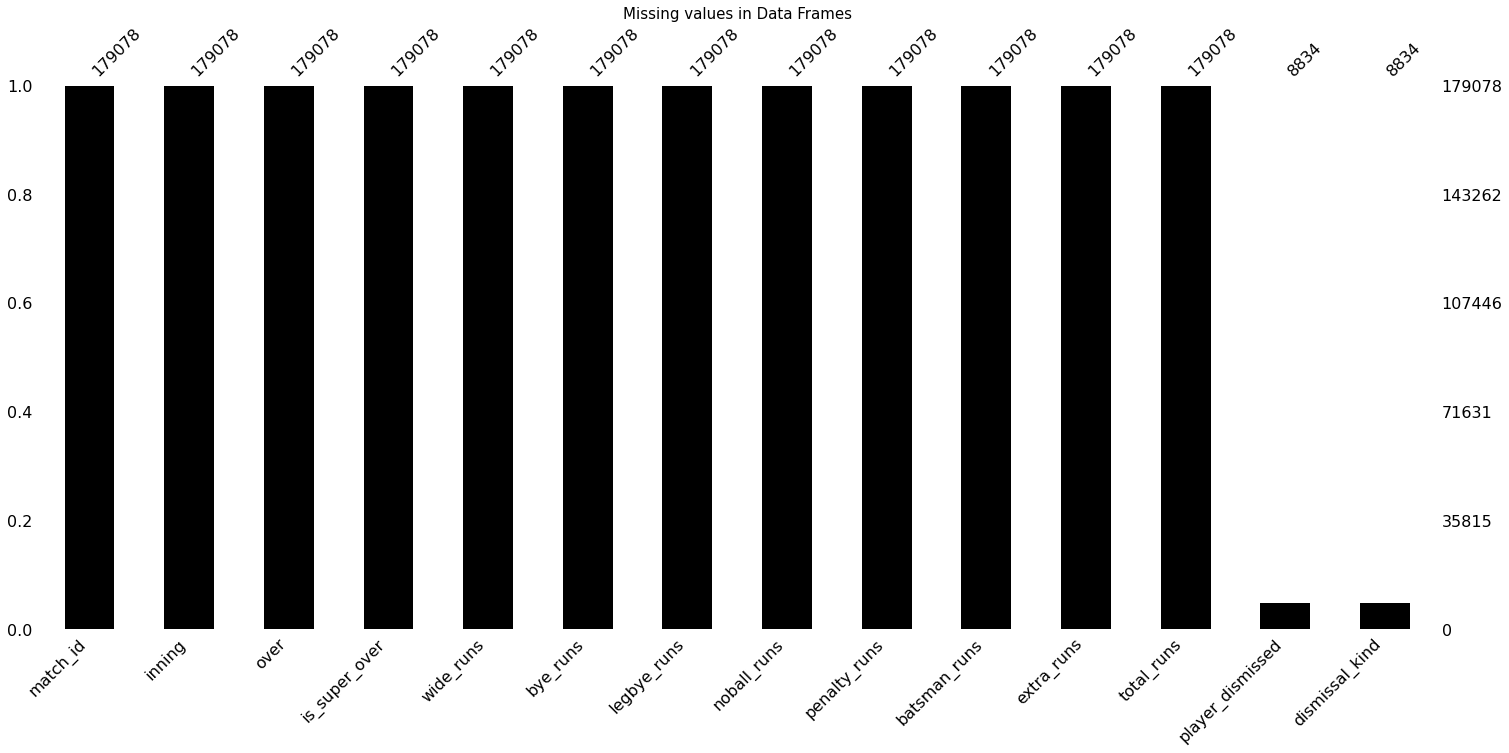

In [17]:
mno.bar(df,color='black')
plt.title("Missing values in Data Frames",fontsize=15)

In [18]:
def find_missing_cols(data):
    columns_with_missing = []
    missing_count = []
    percentage = []
    data_types = []
    for col in data.columns:
        count = data[col].isnull().sum()
        perc = count / len(data) * 100
        dtype = data[col].dtype
        if count > 0:
            columns_with_missing.append(col)
            percentage.append(perc)
            missing_count.append(count)
            data_types.append(dtype)
    missing_df = pd.DataFrame({"Columns":columns_with_missing,"Datatype":data_types,"NO.Of Missing Values":missing_count,"Percentage":percentage})
    return missing_df

In [19]:
find_missing_cols(df)

,Columns,Datatype,NO.Of Missing Values,Percentage
0,player_dismissed,object,170244,95.066954
1,dismissal_kind,object,170244,95.066954


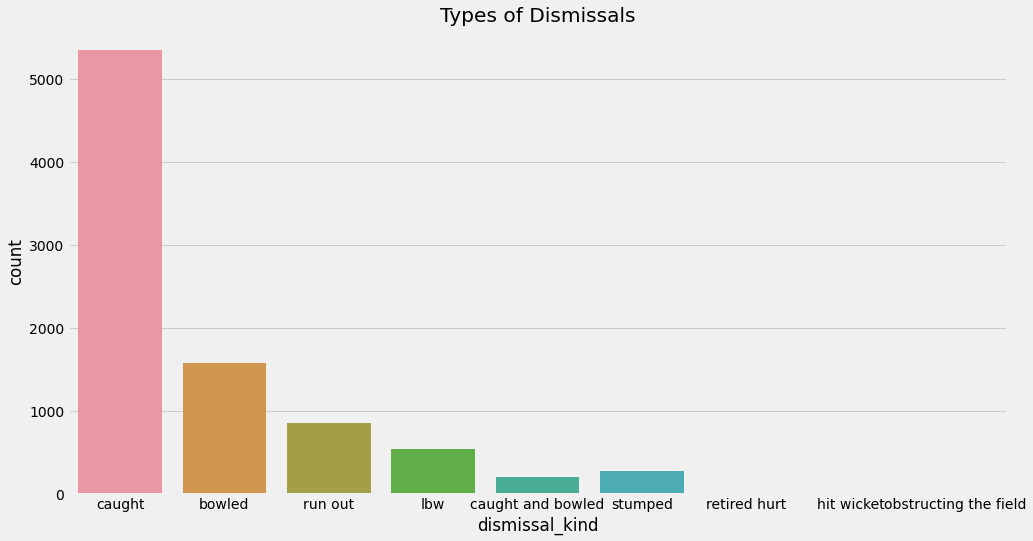

In [23]:
plt.figure(figsize=(15,8))
sns.countplot(df['dismissal_kind'])
plt.title("Types of Dismissals")
plt.show()

In [34]:
caughts_per_over = df[df['dismissal_kind'] == 'caught'].groupby('over')['dismissal_kind'].agg("count").values

In [36]:
caughts_per_over

array([170, 219, 227, 245, 253, 252, 177, 175, 204, 200, 231, 239, 232,
       276, 287, 302, 338, 445, 411, 465], dtype=int64)

In [37]:
index = [i for i in range(1,21)]

In [38]:
caughts_df = pd.DataFrame({"overs":index,'caughts':caughts_per_over})

Text(0.5, 1.0, 'Caughts per Over')

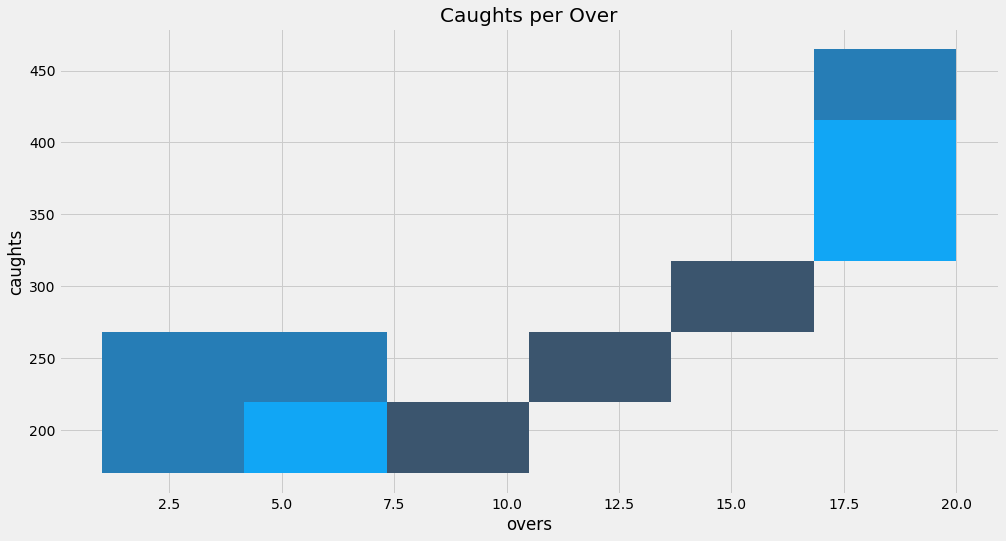

In [39]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15,8))
sns.histplot(x=caughts_df['overs'],y=caughts_df['caughts'],palette='coolwarm')
plt.title("Caughts per Over",fontsize=20)

In [40]:
dismissals_df = pd.DataFrame()
for dismissal in df['dismissal_kind'].unique():
    dismissal_df = df[df['dismissal_kind'] == dismissal]
    dismissals_df = pd.concat([dismissals_df,dismissal_df])

In [42]:
dismissals_df

,match_id,inning,over,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind
11,1,1,2,0,0,0,0,0,0,0,0,0,DA Warner,caught
64,1,1,11,0,0,0,0,0,0,0,0,0,S Dhawan,caught
94,1,1,16,0,0,0,0,0,0,0,0,0,MC Henriques,caught
165,1,2,7,0,0,0,0,0,0,0,0,0,CH Gayle,caught
206,1,2,13,0,0,0,0,0,0,0,0,0,TM Head,caught
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146217,618,1,18,0,0,0,0,0,0,0,0,0,DJ Hooda,hit wicket
147152,622,2,13,0,0,0,0,0,0,0,0,0,DA Warner,hit wicket
175184,11334,2,19,0,0,0,0,0,0,0,0,0,R Parag,hit wicket
105613,445,2,18,0,0,0,0,0,0,0,0,0,YK Pathan,obstructing the field


In [62]:
dismissals_df[dismissals_df['dismissal_kind'] == 'caught']['over'].value_counts()
# Most of the Caughts outs are placing in 20th Over

20    465
18    445
19    411
17    338
16    302
15    287
14    276
5     253
6     252
4     245
12    239
13    232
11    231
3     227
2     219
9     204
10    200
7     177
8     175
1     170
Name: over, dtype: int64

In [63]:
dismissals_df[dismissals_df['dismissal_kind'] == 'bowled']['over'].value_counts().sort_values()
# Most of the bowled outs are placing in 19th Over

7      50
12     53
8      54
14     57
1      59
10     61
4      62
6      65
11     66
9      69
5      71
2      71
13     75
15     77
3      78
16     86
17    101
18    133
19    141
20    152
Name: over, dtype: int64

In [71]:
dismissals_df[dismissals_df['dismissal_kind'] == 'lbw']['over'].value_counts()
# Most of the Lbw outs are placing in 1th Over

1     45
8     37
9     34
16    33
4     32
19    31
2     29
14    29
11    28
3     27
20    26
5     25
15    25
6     24
7     23
13    21
10    21
17    20
12    18
18    12
Name: over, dtype: int64

In [94]:
max_dismissals_list = []
overs_list = []
for dismissal_kind in dismissals_df['dismissal_kind'].unique():
    
    dismissals = dismissals_df[dismissals_df['dismissal_kind'] == dismissal_kind]['over'].value_counts().values
    
    overs = dismissals_df[dismissals_df['dismissal_kind'] == dismissal_kind]['over'].value_counts().index
    
    kind_df = pd.DataFrame({"dismissals":dismissals,"overs":overs})
    
    max_dismissals = max(kind_df['dismissals'])
    
    max_dismissal_over = kind_df[kind_df['dismissals'] == max(kind_df['dismissals'])]['overs'][0]
    
    max_dismissals_list.append(max_dismissals)
    overs_list.append(max_dismissal_over)

In [96]:
max_dismissal_df = pd.DataFrame({"Max.NO.Of Dismissals":max_dismissals_list,"Over":overs_list})
max_dismissal_df.index = dismissals_df['dismissal_kind'].unique()
max_dismissal_df

,Max.NO.Of Dismissals,Over
caught,465,20
bowled,152,20
run out,215,20
lbw,45,1
caught and bowled,19,19
stumped,24,12
retired hurt,3,20
hit wicket,3,18
obstructing the field,1,18


In [97]:
count_df = dismissals_df.groupby(['over','dismissal_kind']).agg("count")

In [98]:
len(count_df)

138

In [99]:
count_df.reset_index(inplace=True)

In [100]:
count_df

,over,dismissal_kind,match_id,inning,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed
0,1,bowled,59,59,59,59,59,59,59,59,59,59,59,59
1,1,caught,170,170,170,170,170,170,170,170,170,170,170,170
2,1,caught and bowled,3,3,3,3,3,3,3,3,3,3,3,3
3,1,lbw,45,45,45,45,45,45,45,45,45,45,45,45
4,1,retired hurt,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,20,lbw,26,26,26,26,26,26,26,26,26,26,26,26
134,20,obstructing the field,1,1,1,1,1,1,1,1,1,1,1,1
135,20,retired hurt,3,3,3,3,3,3,3,3,3,3,3,3
136,20,run out,215,215,215,215,215,215,215,215,215,215,215,215


In [114]:
dis = []
for i in range(0,len(count_df),10):
    dis.append(count_df['player_dismissed'][i:i+9].values)

In [115]:
dis

[array([ 59, 170,   3,  45,   1,  21,   7,  71, 219], dtype=int64),
 array([ 29,   1,  27,   1,  78, 227,   8,  27,  25], dtype=int64),
 array([ 62, 245,   8,   1,  32,   3,  26,   8,  71], dtype=int64),
 array([  8,   1,  25,  20,   7,  65, 252,   7,   1], dtype=int64),
 array([ 25,   6,  50, 177,  12,   1,  23,  29,  16], dtype=int64),
 array([175,  14,  37,  27,  17,  69, 204,   9,  34], dtype=int64),
 array([ 32,  20,  61, 200,  11,  21,  25,  20,  66], dtype=int64),
 array([ 12,  28,  22,  24,  53, 239,  10,  18,   1], dtype=int64),
 array([ 24,  75, 232,   9,   1,  21,  28,  12,  57], dtype=int64),
 array([ 15,  29,   1,  36,  20,  77, 287,   9,  25], dtype=int64),
 array([ 15,  86, 302,  14,  33,  40,  23, 101, 338], dtype=int64),
 array([ 20,   1,  44,  20, 133, 445,  13,   3,  12], dtype=int64),
 array([ 59,  14, 141, 411,  19,   1,  31,  84,   5], dtype=int64),
 array([465,  18,   1,  26,   1,   3, 215,  13], dtype=int64)]

In [116]:
count_df['dismissal_kind'].nunique()

9

In [117]:
pd.DataFrame(dis,columns=count_df['dismissal_kind'].unique())

,bowled,caught,caught and bowled,lbw,retired hurt,run out,stumped,hit wicket,obstructing the field
0,59,170,3,45,1,21,7,71,219.0
1,29,1,27,1,78,227,8,27,25.0
2,62,245,8,1,32,3,26,8,71.0
3,8,1,25,20,7,65,252,7,1.0
4,25,6,50,177,12,1,23,29,16.0
5,175,14,37,27,17,69,204,9,34.0
6,32,20,61,200,11,21,25,20,66.0
7,12,28,22,24,53,239,10,18,1.0
8,24,75,232,9,1,21,28,12,57.0
9,15,29,1,36,20,77,287,9,25.0


In [118]:
df.head()

,match_id,inning,over,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind
0,1,1,1,0,0,0,0,0,0,0,0,0,NaN,NaN
1,1,1,1,0,0,0,0,0,0,0,0,0,NaN,NaN
2,1,1,1,0,0,0,0,0,0,4,0,4,NaN,NaN
3,1,1,1,0,0,0,0,0,0,0,0,0,NaN,NaN
4,1,1,1,0,2,0,0,0,0,0,2,2,NaN,NaN


In [123]:
df['is_super_over'].value_counts()

0    178997
1        81
Name: is_super_over, dtype: int64

In [121]:
df.groupby("match_id")['is_super_over'].agg("sum")

match_id
1        0
2        0
3        0
4        0
5        0
        ..
11347    0
11412    0
11413    0
11414    0
11415    0
Name: is_super_over, Length: 756, dtype: int64

In [124]:
81 / 756

0.10714285714285714

In [119]:
sum(df['is_super_over']) / len(df.groupby('match_id'))

0.10714285714285714

In [103]:
dismissals = df.groupby('over')['player_dismissed'].agg("count").values
overs = df.groupby('over')['player_dismissed'].agg("count").index

Text(0, 0.5, 'Dismissals')

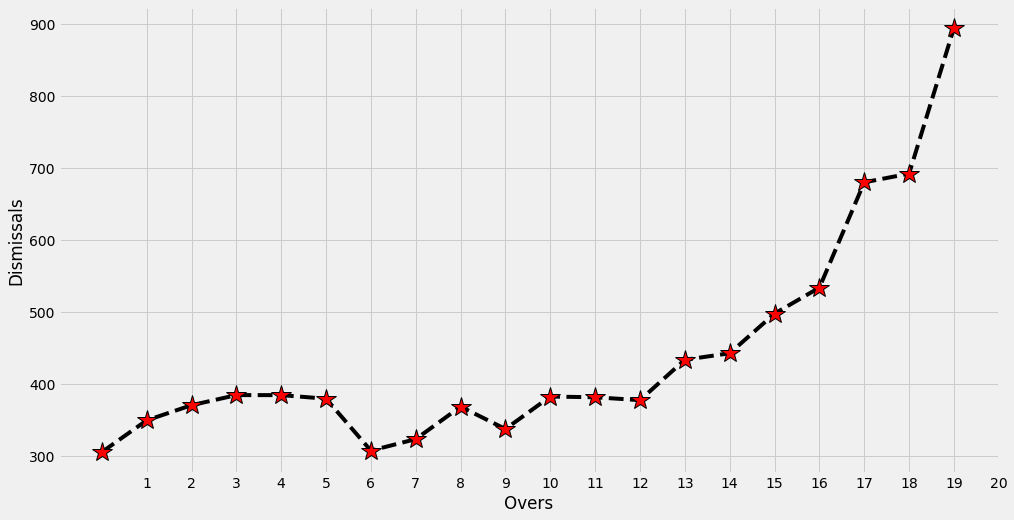

In [104]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15,8))
plt.plot(dismissals,'black',linestyle="--",marker="*",markersize=20,markerfacecolor='red')
plt.xticks(overs)
plt.xlabel("Overs")
plt.ylabel("Dismissals")

Text(0, 0.5, 'Wide Runs')

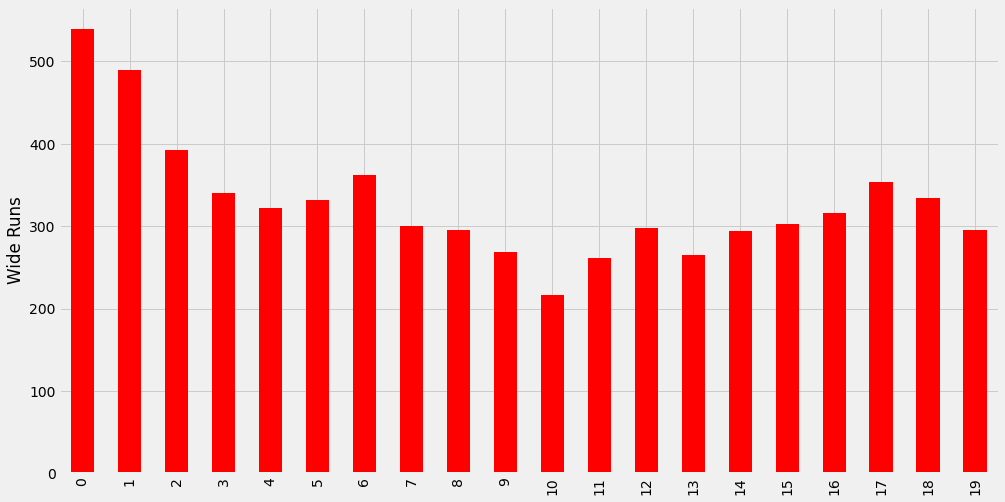

In [128]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(15,8))
wide_runs = df.groupby('over')['wide_runs'].agg("sum").values
overs = df.groupby('over')['wide_runs'].agg("sum").index
wide_df = pd.DataFrame({"Overs":overs,"Wide_Runs":wide_runs})
wide_df['Wide_Runs'].plot(kind='bar',colormap="prism")
plt.ylabel("Wide Runs")

Text(0, 0.5, 'bye_runs')

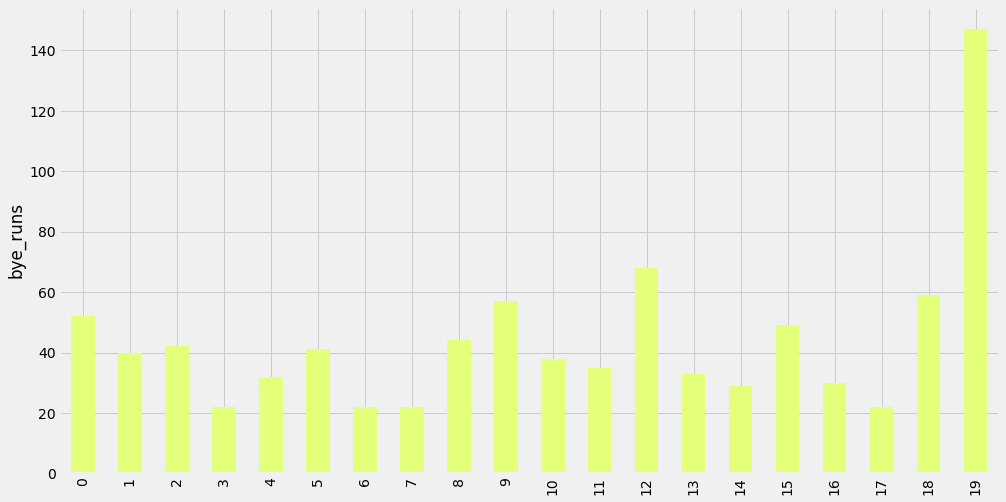

In [119]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(15,8))
bye_runs = df.groupby('over')['bye_runs'].agg("sum").values
overs = df.groupby('over')['bye_runs'].agg("sum").index
wide_df = pd.DataFrame({"Overs":overs,"bye_runs":bye_runs})
wide_df['bye_runs'].plot(kind='bar',colormap="Wistia")
plt.ylabel("bye_runs")

Text(0, 0.5, 'legbye_runs')

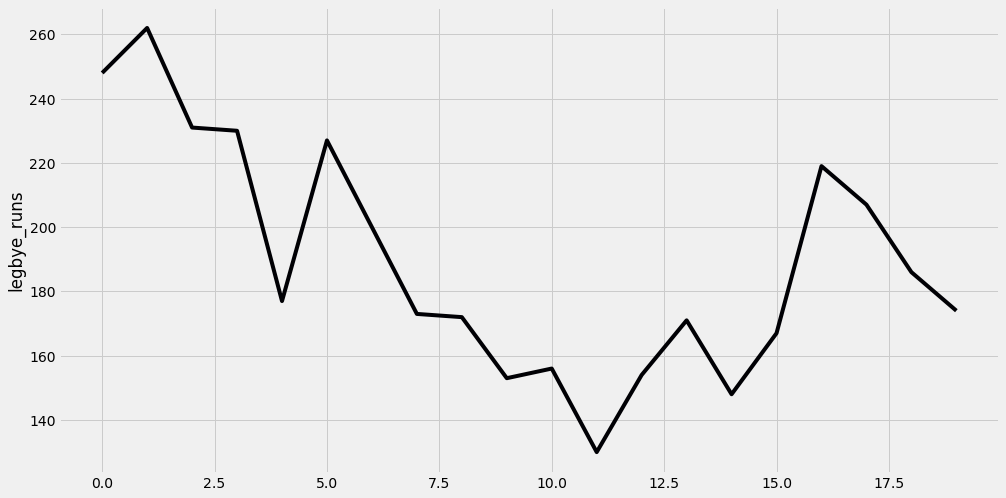

In [134]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(15,8))
legbye_runs = df.groupby('over')['legbye_runs'].agg("sum").values
overs = df.groupby('over')['legbye_runs'].agg("sum").index
legbye_runs = pd.DataFrame({"Overs":overs,"legbye_runs":legbye_runs})
legbye_runs['legbye_runs'].plot(kind='line',colormap="inferno")
plt.ylabel("legbye_runs")

In [225]:
df_matches = pd.read_csv("matches.csv")

In [227]:
df_matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [230]:
df_matches["toss_and_match_winner"] = 0
for i in range(len(df_matches)):
    if df_matches['toss_winner'][i] == df_matches['winner'][i]:
        df_matches['toss_and_match_winner'][i] = 1

In [236]:
df_matches["toss_and_match_winner"].value_counts() / len(df_matches)

1    0.519841
0    0.480159
Name: toss_and_match_winner, dtype: float64

In [237]:
# There is only 2% matches are won by the team who won the Toss

# Conclusion
### Most players are getting out by Caught
#### Most of the Caught Outs, Bowled & Run outs are happening in the #20th Over.
#### The Least type of Dismissal Kind was Obstructing the Field.
#### There is only 0.0104% Chance for Super over Match.
#### There is only 2% matches are won by the team who won the Toss